In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("heart_data.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
data['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

### dataset is balanced

In [6]:
obj=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
for i in obj:
    print(i, len(data[i].unique()))

sex 2
cp 4
fbs 2
restecg 3
exang 2
slope 3
ca 5
thal 4


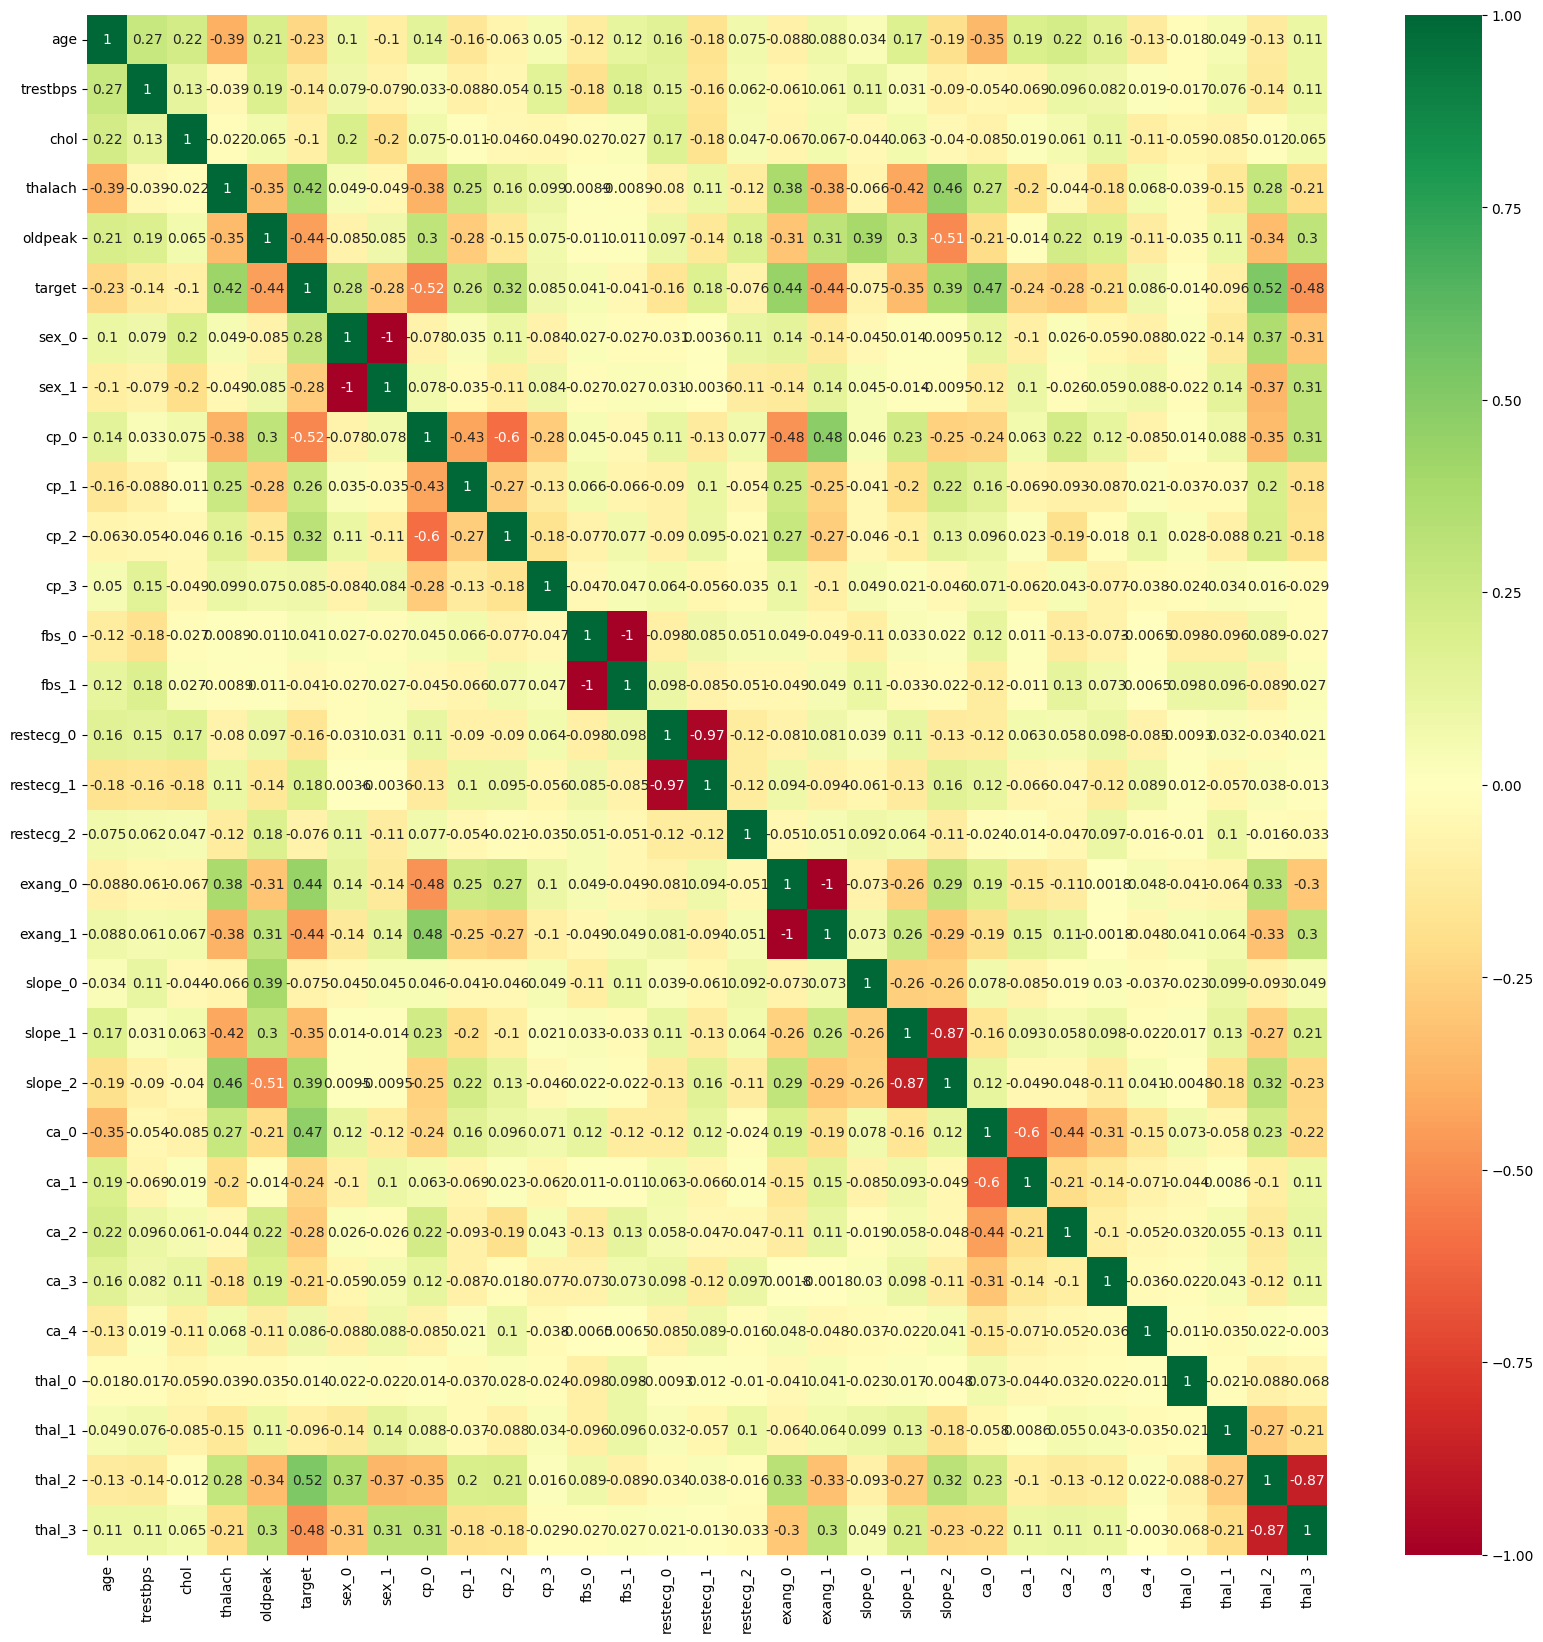

In [20]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [8]:
data = pd.get_dummies(data, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])


In [9]:
X = data.drop('target',axis=1)
y = data['target']


## split the data into train set and test set

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

## RANDOM FOREST CLASSIFIER

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model_1=RandomForestClassifier(n_estimators=20, random_state=12,max_depth=6)
model_1.fit(X_train, y_train)
model_lr=model_1.predict(X_test)
print(accuracy_score(y_test, model_lr))


0.961038961038961


## LOGISTIC REGRESSION CLASSIFIER

In [12]:
from sklearn.linear_model import LogisticRegression
model_2= LogisticRegression()
model_2.fit(X_train, y_train)
y_pred = model_2.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8928571428571429


## DECISION TREE CLASSIFIER

In [13]:
from sklearn.tree import DecisionTreeClassifier
model_3 = DecisionTreeClassifier()
model_3.fit(X_train, y_train)
y_pred = model_3.predict(X_test)
print(accuracy_score(y_test, y_pred))


0.9902597402597403


## SVC CLASSIFIER

In [14]:
from sklearn.svm import SVC
model_4= SVC()
model_4.fit(X_train, y_train)
y_pred = model_4.predict(X_test)
print(accuracy_score(y_test, y_pred))


0.75


## K NEIGHBORS CLASSIFIER

In [15]:
from sklearn.neighbors import KNeighborsClassifier
model_5= KNeighborsClassifier()
model_5.fit(X_train, y_train)
y_pred = model_5.predict(X_test)
print(accuracy_score(y_test, y_pred))


0.737012987012987


GAUSSIAN NB CLASSIFIER

In [16]:
from sklearn.naive_bayes import GaussianNB
model_6= GaussianNB()
model_6.fit(X_train, y_train)
y_pred = model_6.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8766233766233766


## XGB CLASSIFIER

In [17]:
from xgboost import XGBClassifier
model_7= XGBClassifier()
model_7.fit(X_train, y_train)
y_pred = model_7.predict(X_test)
print(accuracy_score(y_test, y_pred))

1.0


## BY ALL THIS MODELS XGB AND DECISION TREE CLASSIFIER GET THE HIGHEST ACCURACY

In [18]:
import pickle
pickle.dump(model_3, open('rf.pkl', 'wb'))
pickle.dump(data, open('data.pkl', 'wb'))